# **Phase 3: Top**
---

#### import [d_cycle.py](d_cycle.py) and `fredapi` 

In [1]:
import os
import d_cycle as dc
from fredapi import Fred

api_key = os.environ.get("FRED_API_KEY")
fred = Fred(api_key=api_key)

2008 Bubble Start: 2002-01-01
2008 Bubble End: 2009-01-01
2008 Top Start: 2005-01-01
2008 Top End: 2009-01-01


## Peak of ST few months before peak of market 


## Policy Changes vs. Asset Price Changes Moving Economic Growth 

### Yield Curve 

In [2]:
# Yield Curve 
# https://en.saif.sjtu.edu.cn/junpan/slides/Slides3_Class3.pdf

# Fed Funds Effective Rate (DFF) 

#### US T-BONDS 
# Two (DGS2)
# Five (DGS5)
# Ten (DGS10)
# Twenty (DGS20)
# Thrity (DGS30)

whole_cycle = dc.PLOTTING(start=dc.start_2008, end=dc.end_2008)
top_cycle = dc.PLOTTING(start=dc.top_start_08, end=dc.top_end_08)

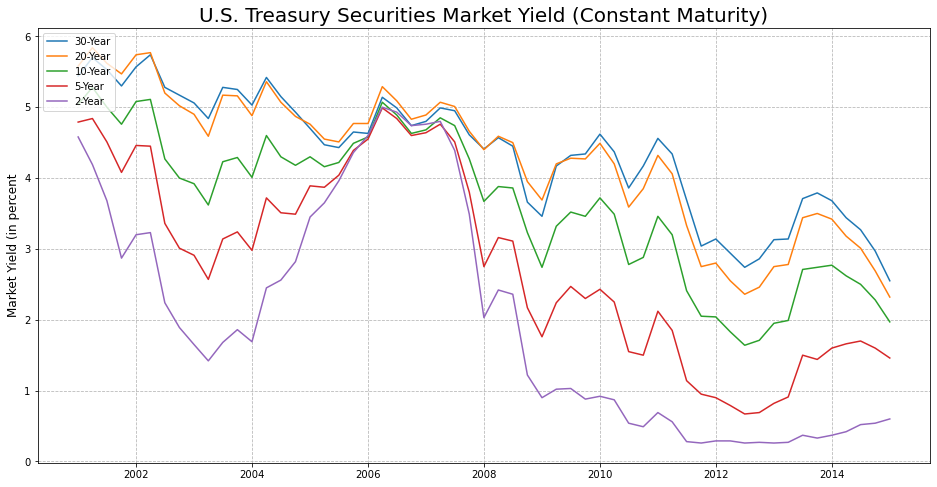

In [3]:
whole_cycle.plot_t_bond_maturity()

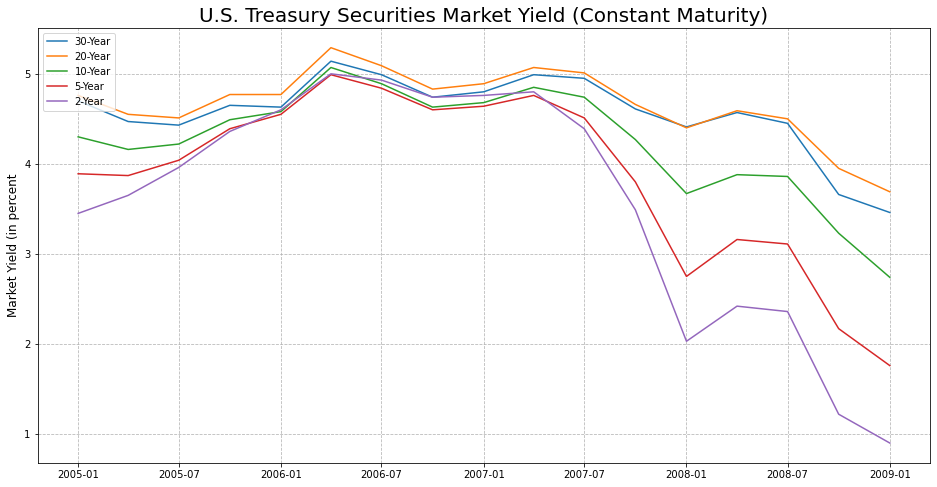

In [4]:
top_cycle.plot_t_bond_maturity()

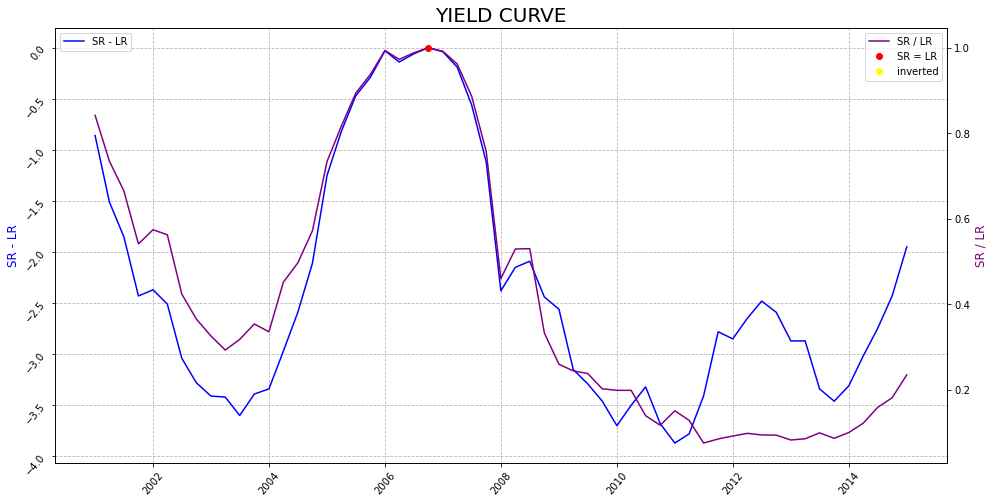

In [3]:
whole_cycle.plot_SR_LR()

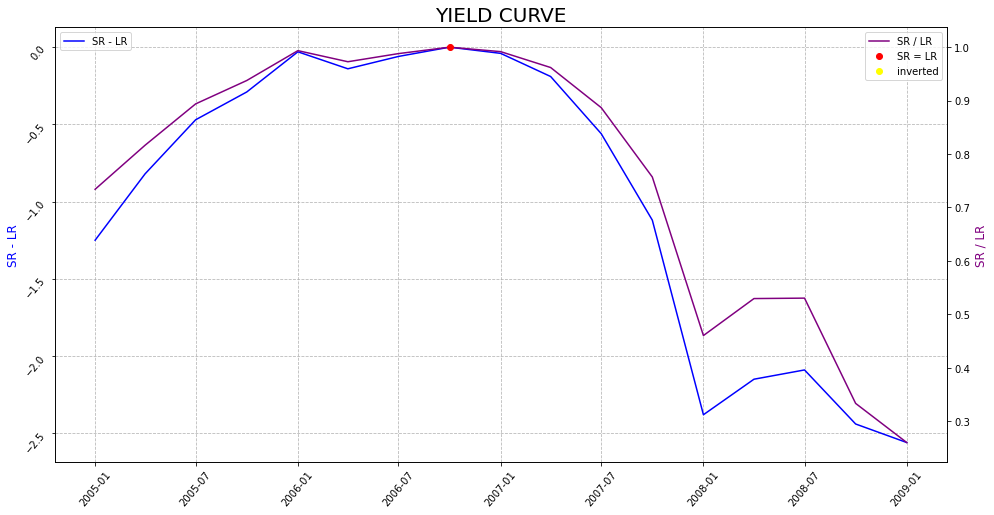

In [4]:
top_cycle.plot_SR_LR()

### Equity Price (Indexed)

In [ ]:
# Equity Price (Indexed) 
# NASDAQ COMPOSITE INDEX 


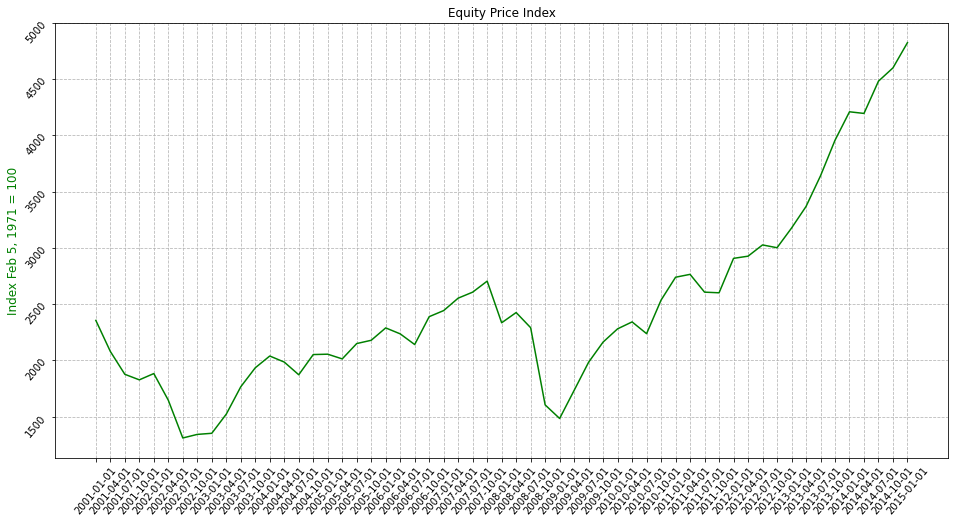

In [5]:
whole_cycle.plot_equity_price_index()

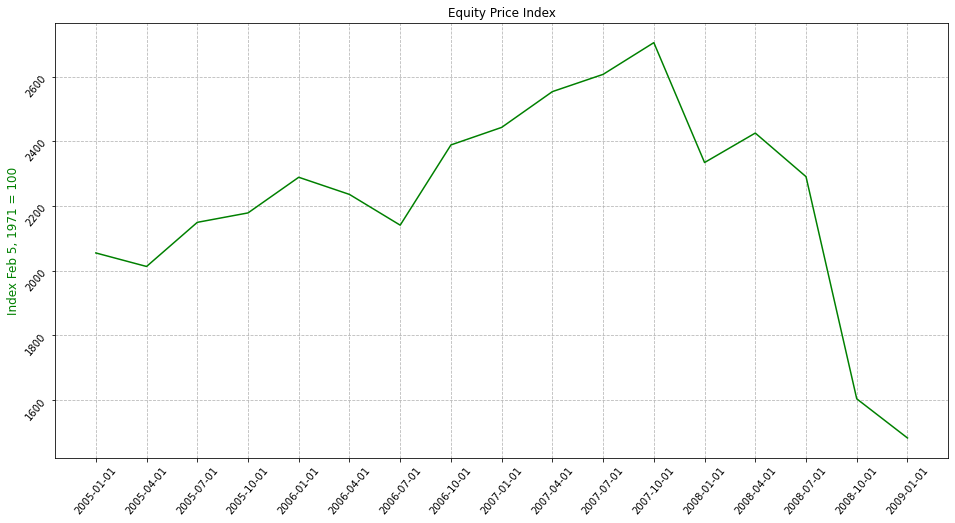

In [6]:
top_cycle.plot_equity_price_index()

In [7]:
# Wealth Effect of Asset Price Movements Has a Bigger Impace on Economic Growth Rates than Monetary Policy Does 

In [53]:
# As Wealth Falls Income Falls (GDI)
# Creditworthiness Worsens (DRCCLACBS)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
list = ['NASDAQCOM', 'GDI', 'DRCCLACBS', 'GDP']
df = {} 
for i in range(len(list)): 
    df[list[i]] = fred.get_series(list[i], dc.start_2008, dc.end_2008, frequency='q')
df =  pd.DataFrame(df)
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
#df['GDP'] = df['GDP'] * 1000000

In [94]:
df['Equity_Change'] = (df['NASDAQCOM']-df['NASDAQCOM'].shift(1,axis=0)) / df['NASDAQCOM']
df['Income_Change'] = (df['GDI'] - df['GDI'].shift(1,axis=0)) / df['GDI']
df['Credit_Change'] = (df['DRCCLACBS'] - df['DRCCLACBS'].shift(1,axis=0)) / df['DRCCLACBS']
df['GDP_Change'] = (df['GDP'] - df['GDP'].shift(1,axis=0)) / df['GDP']

Text(0.5, 1.0, 'Changes in Asset Prices and Economy')

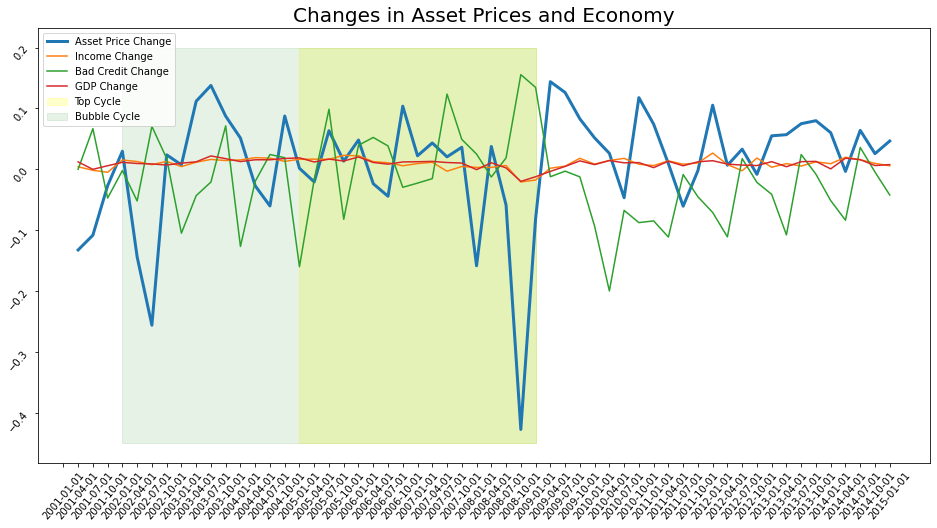

In [93]:
plt.figure(figsize=(16,8))

plt.plot(df['Equity_Change'], label='Asset Price Change', linewidth=3)
plt.plot(df['Income_Change'], label='Income Change')
plt.plot(df['Credit_Change'], label='Bad Credit Change')
plt.plot(df['GDP_Change'], label='GDP Change')

idk = np.linspace(-0.45,0.2)
plt.fill_betweenx(idk, x1=dc.top_start_08, x2=dc.top_end_08, color='yellow', alpha=0.2, label='Top Cycle')
plt.fill_betweenx(idk, dc.bubble_start_08, dc.bubble_end_08, color='green', alpha=0.1, label='Bubble Cycle')
plt.tick_params(rotation=50)
plt.legend(loc=2)

plt.title('Changes in Asset Prices and Economy', fontsize=20)